In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Preprocessing

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median(), inplace=True)
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median(), inplace=True)

In [6]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Feature creation

### Exercise 1

In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
df['monthly_average_purchase'] = df.eval('PURCHASES / TENURE')
df['monthly_average_cash_advance'] = df.eval('CASH_ADVANCE / TENURE')

### Exercise 2

In [9]:
df.query('ONEOFF_PURCHASES > 0 & INSTALLMENTS_PURCHASES > 0').shape

(2774, 20)

In [10]:
df.query('ONEOFF_PURCHASES > 0 & INSTALLMENTS_PURCHASES <= 0').shape

(1874, 20)

In [11]:
df.query('ONEOFF_PURCHASES <= 0 & INSTALLMENTS_PURCHASES > 0').shape

(2260, 20)

In [12]:
df.query('ONEOFF_PURCHASES <= 0 & INSTALLMENTS_PURCHASES <= 0').shape

(2042, 20)

In [13]:
df['purchase_type'] = None
for index, value in df.iterrows():
    
    if (value.ONEOFF_PURCHASES > 0 and value.INSTALLMENTS_PURCHASES > 0):
        df.at[index, 'purchase_type'] = 'both'
    elif (value.ONEOFF_PURCHASES > 0 and value.INSTALLMENTS_PURCHASES <= 0):
        df.at[index, 'purchase_type'] = 'oneoff'
    elif (value.ONEOFF_PURCHASES <= 0 and value.INSTALLMENTS_PURCHASES > 0):
        df.at[index, 'purchase_type'] = 'installment'
    else:
        df.at[index, 'purchase_type'] = 'none'

### Exercise 3

In [36]:
df['PURCHASES'] = df.PURCHASES.apply(lambda x: x + 0.01 if x <= 0 else x)

In [37]:
df['average_amount_per_purchase'] = df.eval('PAYMENTS / PURCHASES')
df['cash_advance_per_purchase'] = df.eval('CASH_ADVANCE_TRX / PURCHASES')

### Exercise 4

In [38]:
df['limit_usage'] = df.BALANCE / df.CREDIT_LIMIT

### Exercise 5

In [39]:
df['payment_minimum_payments'] = df.eval('PAYMENTS / MINIMUM_PAYMENTS')

### Insight

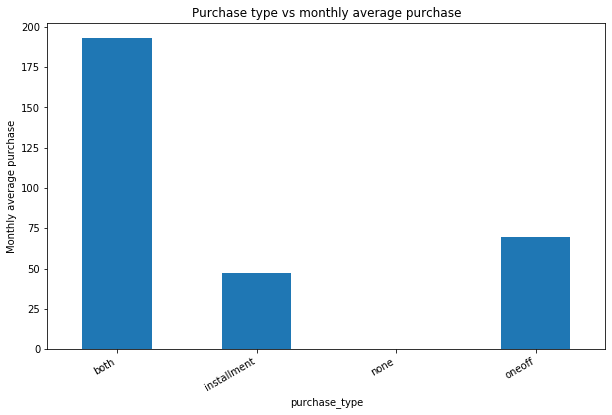

In [40]:
df.groupby('purchase_type').monthly_average_purchase.mean()\
.plot.bar(figsize=(10, 6), title='Purchase type vs monthly average purchase', ylabel='Monthly average purchase')
plt.xticks(rotation=30, ha='right');

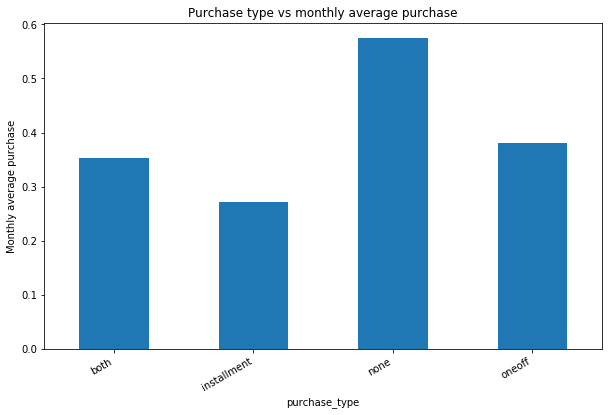

In [41]:
df.groupby('purchase_type').limit_usage.mean()\
.plot.bar(figsize=(10, 6), title='Purchase type vs monthly average purchase', ylabel='Monthly average purchase')
plt.xticks(rotation=30, ha='right');

## Clustering

Unsupervised learning:
- Clustering
- Dimensionality reduction

In [43]:
columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'monthly_average_purchase', 'monthly_average_cash_advance',
       'purchase_type', 'average_amount_per_purchase', 'cash_advance_per_purchase', 'limit_usage', 'payment_minimum_payments']

In [44]:
df_new = df[columns]
df_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,monthly_average_purchase,monthly_average_cash_advance,purchase_type,average_amount_per_purchase,cash_advance_per_purchase,limit_usage,payment_minimum_payments
0,40.900749,0.818182,95.40,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,0.000000,7.950000,0.000000,installment,2.115326,0.000000,0.040901,1.446508
1,3202.467416,0.909091,0.01,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,0.000000,536.912124,none,410303.259700,400.000000,0.457495,3.826241
2,2495.148862,1.000000,773.17,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,64.430833,0.000000,oneoff,0.804567,0.000000,0.332687,0.991682
3,1666.670542,0.636364,1499.00,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,312.343947,0.000000,124.916667,17.149001,oneoff,0.000000,0.000667,0.222223,0.000000
4,817.714335,1.000000,16.00,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,0.000000,1.333333,0.000000,oneoff,42.395923,0.000000,0.681429,2.771075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,1.000000,0.000000,0.833333,0.000000,6,1000.0,325.594462,48.886365,0.500000,48.520000,0.000000,installment,1.118420,0.000000,0.028494,6.660231
8946,19.183215,1.000000,300.00,1.000000,0.000000,0.833333,0.000000,6,1000.0,275.861322,312.343947,0.000000,50.000000,0.000000,installment,0.919538,0.000000,0.019183,0.883197
8947,23.398673,0.833333,144.40,0.833333,0.000000,0.666667,0.000000,5,1000.0,81.270775,82.418369,0.250000,24.066667,0.000000,installment,0.562817,0.000000,0.023399,0.986076
8948,13.457564,0.833333,0.01,0.000000,0.000000,0.000000,0.166667,0,500.0,52.549959,55.755628,0.250000,0.000000,6.093130,none,5254.995900,200.000000,0.026915,0.942505


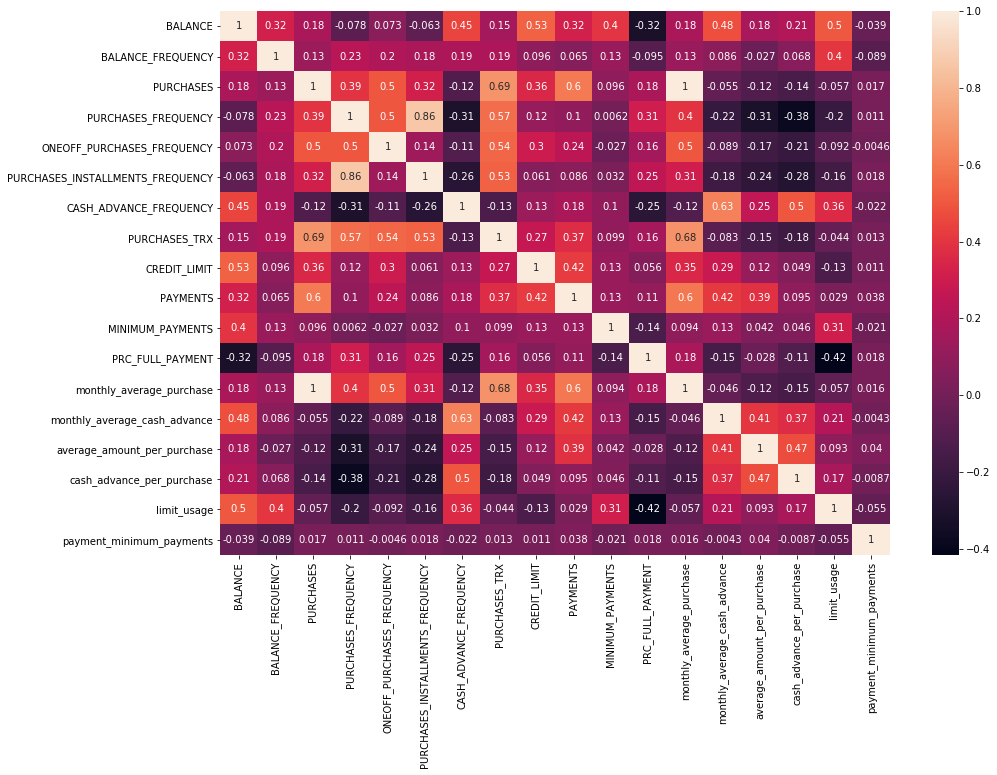

In [47]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_new.corr(), annot=True);

In [50]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

- Intra-cluster: Minimum
- Inter-cluster: Maximum
- Find centroid:
+ Tính khoảng cách --> gán cluster --> dịch chuyển cluster (trung bình các điểm trong cùng 1 cluster) --> đo khoảng cách lại --> gán cluster

max - min = 1000000, [0, 1]

StandardScaler = x - mean / std - > [-sqrt(3), sqrt(3)]

MinMaxScaler = x - min / max - min -- > [0 - 1]

One-hot encoding:
- Convert categorical to nummeric: Monday, Tuesday...
- 1, 2, 3, 4:

In [115]:
df_train = pd.concat([df_new, pd.get_dummies(df_new.purchase_type)], axis=1)

In [116]:
df_train.drop(columns=['purchase_type'], inplace=True)

In [117]:
scaler = MinMaxScaler()
train = scaler.fit_transform(df_train)

In [60]:
train

array([[2.14779454e-03, 8.18182000e-01, 1.94516427e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57660468e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94435758e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22930222e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [65]:
scores = []
for n in range(2, 8):
    kmean = KMeans(n_clusters=n)
    kmean.fit(train)
    scores.append(silhouette_score(train, kmean.predict(train)))

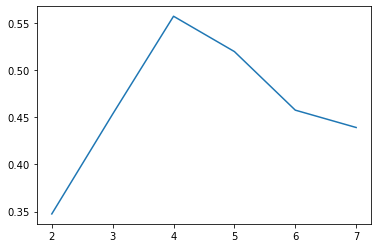

In [71]:
plt.plot(range(2, 8), scores);

In [75]:
kmean = KMeans(n_clusters=4)
kmean.fit(train)

KMeans(n_clusters=4)

In [78]:
df_new['label'] = kmean.labels_

/Applications/anaconda3/envs/nmtruong/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
df_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,monthly_average_purchase,monthly_average_cash_advance,purchase_type,average_amount_per_purchase,cash_advance_per_purchase,limit_usage,payment_minimum_payments,label
0,40.900749,0.818182,95.40,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,0.000000,7.950000,0.000000,installment,2.115326,0.000000,0.040901,1.446508,2
1,3202.467416,0.909091,0.01,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,0.000000,536.912124,none,410303.259700,400.000000,0.457495,3.826241,3
2,2495.148862,1.000000,773.17,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,64.430833,0.000000,oneoff,0.804567,0.000000,0.332687,0.991682,0
3,1666.670542,0.636364,1499.00,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,312.343947,0.000000,124.916667,17.149001,oneoff,0.000000,0.000667,0.222223,0.000000,0
4,817.714335,1.000000,16.00,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,0.000000,1.333333,0.000000,oneoff,42.395923,0.000000,0.681429,2.771075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,1.000000,0.000000,0.833333,0.000000,6,1000.0,325.594462,48.886365,0.500000,48.520000,0.000000,installment,1.118420,0.000000,0.028494,6.660231,2
8946,19.183215,1.000000,300.00,1.000000,0.000000,0.833333,0.000000,6,1000.0,275.861322,312.343947,0.000000,50.000000,0.000000,installment,0.919538,0.000000,0.019183,0.883197,2
8947,23.398673,0.833333,144.40,0.833333,0.000000,0.666667,0.000000,5,1000.0,81.270775,82.418369,0.250000,24.066667,0.000000,installment,0.562817,0.000000,0.023399,0.986076,2
8948,13.457564,0.833333,0.01,0.000000,0.000000,0.000000,0.166667,0,500.0,52.549959,55.755628,0.250000,0.000000,6.093130,none,5254.995900,200.000000,0.026915,0.942505,3


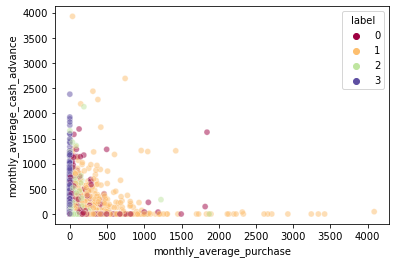

In [86]:
sns.scatterplot(x='monthly_average_purchase', y='monthly_average_cash_advance', hue='label', data=df_new, 
                palette='Spectral', alpha=0.5);

## Dimensionality Reduction

In [87]:
from sklearn.decomposition import PCA

In [119]:
information = []
for n in range(1, 8):
    pca = PCA(n)
    pca.fit_transform(train)
    information.append(pca.explained_variance_ratio_.sum())

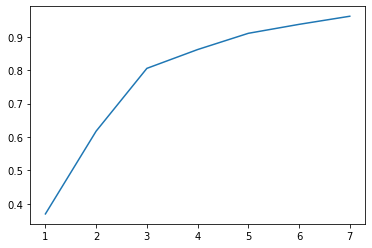

In [121]:
plt.plot(range(1, 8), information);

In [123]:
pd.DataFrame(information, index=range(1, 8))

,0
1,0.369459
2,0.617617
3,0.805778
4,0.862152
5,0.910856
6,0.937705
7,0.962021


In [124]:
pca = PCA(6)
train_2 = pca.fit_transform(train)

In [126]:
for n in range (2, 8):
    kmean = KMeans(n_clusters=4)
    kmean.fit(train_2)
    scores.append(silhouette_score(train, kmean.predict(train)))

KMeans(n_clusters=4)

In [127]:
pca_df = pd.DataFrame(train_2, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6'])

In [128]:
pca_df['label'] = kmean.labels_

In [129]:
pca_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,label
0,-0.330769,-0.519174,0.539216,-0.224190,0.311160,0.033137,2
1,-1.064087,-0.257899,-0.479850,0.215982,-0.108413,-0.058206,1
2,0.253508,1.048370,0.493262,0.103674,-0.667189,0.477136,0
3,-0.434185,0.911459,0.598382,-0.122401,0.219483,-0.031166,0
4,-0.416279,0.906552,0.572562,-0.184230,0.022192,-0.264058,0
...,...,...,...,...,...,...,...
8945,0.488766,-0.878868,0.587355,0.168224,-0.193747,-0.135540,2
8946,0.429002,-0.841625,0.549011,-0.282231,-0.234298,0.049595,2
8947,0.291702,-0.792028,0.581312,-0.020895,-0.022520,0.037064,2
8948,-1.061478,-0.271048,-0.441109,0.272018,-0.012234,-0.015913,1


/Applications/anaconda3/envs/nmtruong/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


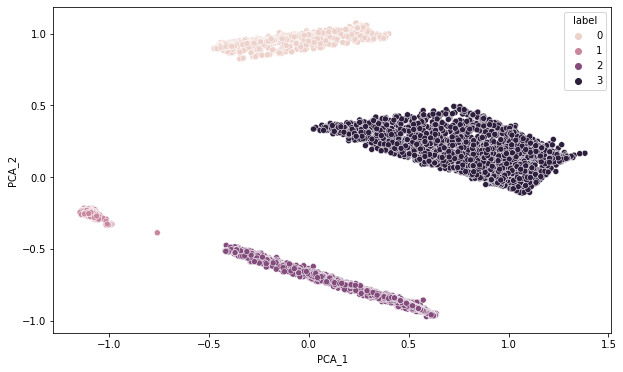

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot('PCA_1', 'PCA_2', hue='label', data=pca_df, sizes=30);

In [131]:
pd.DataFrame(pca.components_.T, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6'], index=df_train.columns)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
BALANCE,-0.011193,0.016690,-0.051967,-0.118633,-0.125329,-0.035720
BALANCE_FREQUENCY,0.058950,0.010099,-0.112608,-0.176207,-0.609179,-0.631533
PURCHASES,0.026156,0.009571,-0.014380,0.022313,-0.025324,0.030273
PURCHASES_FREQUENCY,0.502817,-0.111498,0.048337,0.062053,-0.375411,0.226359
ONEOFF_PURCHASES_FREQUENCY,0.219679,0.256798,-0.119093,0.255237,-0.349157,0.573782
PURCHASES_INSTALLMENTS_FREQUENCY,0.438655,-0.308731,-0.012711,-0.104572,-0.161280,-0.078040
CASH_ADVANCE_FREQUENCY,-0.060648,0.011166,-0.065167,-0.080391,-0.106875,-0.091052
PURCHASES_TRX,0.056137,0.004164,-0.027711,0.018809,-0.057089,0.059271
CREDIT_LIMIT,0.027539,0.032240,-0.041748,0.026747,-0.057904,0.036597
PAYMENTS,0.010427,0.008276,-0.019540,0.025386,-0.024692,0.013227
